In [1]:
import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import requests
import collections
import re
import os

In [2]:
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/timemachine.txt"
response = requests.get(url)
data = response.text
lines = [i + '\n' for i in data.split('\n')]
raw_dataset = [re.sub('[^A-Za-z]+', ' ', i).lower().split() for i in lines] 

In [3]:
for i in raw_dataset[0:10]:
    print(i)

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', 'with', 

In [4]:
words = [word for sentence in raw_dataset for word in sentence]
print(words[0:10])

['the', 'time', 'machine', 'by', 'h', 'g', 'wells', 'i', 'the', 'time']


In [5]:
word_pairs = [i for i in zip(words[1:], words[:-1])]
word_triples = [i for i in zip(words[2:], words[1:-1], words[:-2])]

In [8]:
counter = collections.Counter(words)
counter_pairs = collections.Counter(word_pairs)
counter_triples = collections.Counter(word_triples)

In [25]:
print(counter.most_common(10))
print(counter_pairs.most_common(10))
print(counter_triples.most_common(10))

[('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440)]
[(('the', 'of'), 309), (('the', 'in'), 169), (('had', 'i'), 130), (('was', 'i'), 112), (('the', 'and'), 109), (('time', 'the'), 102), (('was', 'it'), 99), (('the', 'to'), 85), (('i', 'as'), 78), (('a', 'of'), 73)]
[(('traveller', 'time', 'the'), 59), (('machine', 'time', 'the'), 30), (('man', 'medical', 'the'), 24), (('to', 'seemed', 'it'), 16), (('a', 'was', 'it'), 15), (('there', 'and', 'here'), 15), (('me', 'to', 'seemed'), 14), (('not', 'did', 'i'), 14), (('the', 'saw', 'i'), 13), (('to', 'began', 'i'), 13)]


In [18]:
wordscounts = jnp.array([i for _, i in counter.most_common()])
bigramcounts = jnp.array([i for _, i in counter_pairs.most_common()])
triplecounts = jnp.array([i for _, i in counter_triples.most_common()])

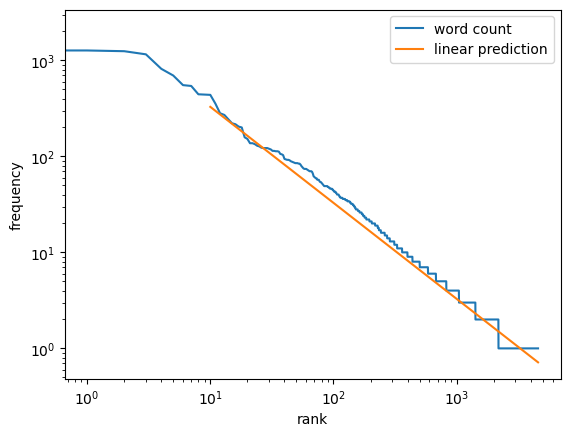

In [50]:
plt.loglog(wordscounts, label='word count')
plt.ylabel('frequency')
plt.xlabel('rank')
start_rank = 10.0
x = jnp.arange(start_rank, len(wordscounts))
total_word = jnp.sum(wordscounts)

y = 0.1 * jnp.power(x, -1) * total_word
plt.loglog(x, y, label='linear prediction')
plt.legend()


Text(0.5, 0, 'rank')

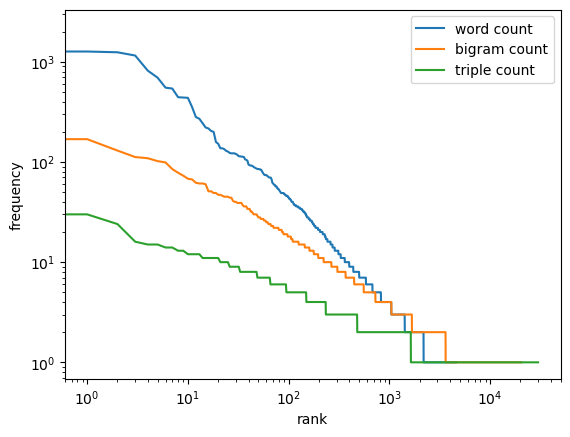

In [53]:
plt.loglog(wordscounts, label='word count')
plt.loglog(bigramcounts, label='bigram count')
plt.loglog(triplecounts, label='triple count')
plt.legend()
plt.ylabel("frequency")
plt.xlabel("rank")